<a href="https://colab.research.google.com/github/Nourelimanehed/ml_notebooks/blob/main/Random_Forest_Glass_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# import the relevant packages
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

### The dataset

In [2]:
# load the dataset from the csv file
data = pd.read_csv("glass_data.csv")

In [3]:
# check what is contained in the data variable
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# how big is the dataset
len(data)

214

In [5]:
# The first column, 'Id', is irrelevant to the model we want to train
data = data.drop(['Id'], axis=1)

In [6]:
# separate the data into the input features (everything without the last column) and the targets (the last column only)
inputs = data.iloc[:,:-1]
targets = data.iloc[:,-1]

In [7]:
# check the inputs
inputs.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [8]:
# check the targets
targets.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [9]:
# we need to split the dataset into a train and test samples
train_input, test_input, train_target, test_target = train_test_split(inputs, targets, test_size=0.2, random_state=42)

### Creating and training the random forest

In [10]:
# define the model as a random forest classifier
clf = RandomForestClassifier(random_state=26)

In [11]:
# train the model
clf.fit(train_input,train_target)

RandomForestClassifier(random_state=26)

In [12]:
# we can now predict a class of a datapoint
clf.predict([train_input.iloc[125]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5])

### Test the performance of our model

In [13]:
# get the predictions based on the test inputs
test_pred = clf.predict(test_input)

In [14]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.83      0.71      0.77        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.86      0.84      0.83        43



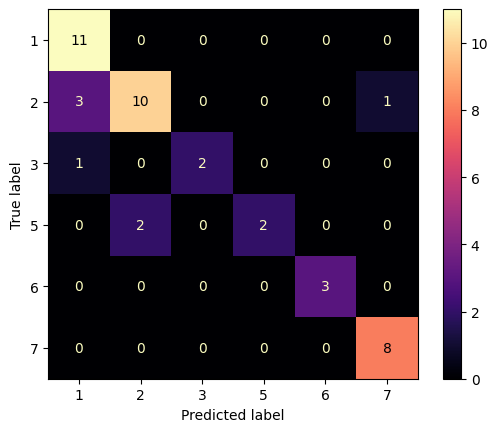

In [18]:
# Removing the seaborn visualization removes the white lines that come with it.
sns.reset_orig()

# Create a confusion matrix
ConfusionMatrixDisplay.from_predictions(
    test_target, test_pred ,
    labels = clf.classes_,
    cmap = 'magma'
);